# Datos del codigo:
* Estudiante: Juan Jose Valverde Campos
* Carnet: B47200
* Laboratorio 4 - CNN
* Profesor: Pablo Sauma Chacón

# Importación de Librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch as pt 
# from torch.utils.data import dataset as Dataset
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Se obtienen los datos con los cuales se va a trabajar

In [2]:
# Custom subdirectory to find images
DIRECTORY = "images"
def load_data():
    def unpickle(file):
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict
    names = [n.decode('utf-8') for n in unpickle(DIRECTORY+"/batches.meta")[b'label_names']]
    x_train = None
    y_train = []
    for i in range(1,6):
        data = unpickle(DIRECTORY+"/data_batch_"+str(i))
        if i>1:
            x_train = np.append(x_train, data[b'data'], axis=0)
        else:
            x_train = data[b'data']
        y_train += data[b'labels']
    data = unpickle(DIRECTORY+"/test_batch")
    x_test = data[b'data']
    y_test = data[b'labels']
    return names,x_train,y_train,x_test,y_test

names,x_train,y_train,x_test,y_test = load_data()

# Se obtiene la visualización de imágenes

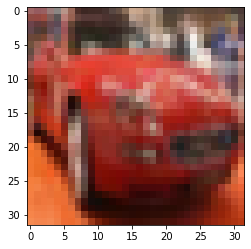

automobile


In [3]:
def plot_tensor(tensor, perm=None):
    if perm==None: perm = (1,2,0)
    plt.figure()
    plt.imshow(tensor.permute(perm).numpy().astype(np.uint8))
    plt.show()
images = pt.Tensor(x_train)
images = images.resize_(50000,3,32,32)
plot_tensor(images[5])
print(names[y_train[5]])


# Se crea la clase que va a ser llamada para entrenarse

In [4]:
# Se crea una clase que hereda de torch.nn.Module
# En el constructor se debe llamar al constructor padre  y crear sus capas
# Y se debe crear su método forward que ejecuta el paso de los datos por las neuronas


class SurvivorClassifier(pt.nn.Module):
	# def __init__(self, struct, activations,type):
	def __init__(self):
		super().__init__()
		# self.fc = []
		# self.act = []

		# self.fc1 = pt.nn.Linear(9, 5)
		# self.act1 = pt.nn.ReLU()
		# self.fc2 = pt.nn.Linear(5, 1)
		# self.act2 = pt.nn.Sigmoid()
		self.fc1 = pt.nn.Conv2d(3, 5, (3,3))
		self.act1 = pt.nn.ReLU()
		self.pool1 = pt.nn.MaxPool2d(2)

		self.fc2 = pt.nn.Conv2d(5, 3, (3,3))
		self.act2 = pt.nn.ReLU()
		self.pool2 = pt.nn.MaxPool2d(2)

		self.fc3 = pt.nn.Linear(108, 10)
		self.act3 = pt.nn.Sigmoid()





	def forward(self, x):
		h1 = self.pool1(self.act1(self.fc1(x)))
		h2 = self.pool2(self.act2(self.fc2(h1)))
		h3 = self.fc3(h2.view(h2.size(0), -1) )# Repasar que se hizo .... (Tiene una entrada enorme....)
		return self.act3( h3 )
		# h = self.act1( self.fc1(x) )
		# out = self.act2( self.fc2(h) )
		# return out


# Se convierte los datos en tensores y se hace los batch de entrenamiento

In [12]:
names,x_train,y_train,x_test,y_test = load_data()
x_train = pt.Tensor(x_train)
y_train = pt.Tensor(y_train)
x_test = pt.Tensor(x_test)
y_test = pt.Tensor(y_test)
x_train = x_train.resize_(50000,3,32,32)
x_test = x_train.resize_(10000,3,32,32)

In [6]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        super(MyDataset, self).__init__()
        assert x.shape[0] == y.shape[0] # assuming shape[0] = dataset size
        self.x = x
        self.y = y


    def __len__(self):
        return self.y.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
traindata = MyDataset(x_train, y_train)
train_dataloader = DataLoader(traindata, batch_size=5000, shuffle=True)
# train_features, train_labels = next(iter(train_dataloader))

Se instancia el modelo y sus parametros

In [7]:
model = SurvivorClassifier()	# Crea el modelo
loss_fn = pt.nn.MSELoss()		# Función de error a utilizar
optimizer = pt.optim.Adam(model.parameters(), lr=0.01)		# Optimizador

for i in range(100):
	optimizer.zero_grad()			# Coloca los Δw en 0
	y_pred = model(  x_train )		# Predice los valores del conjunto de entrenamiento
	loss = loss_fn(y_pred.max(1).values, y_train)	# Calcula la pérdida
	loss.backward()					# Calcula el backprogration (Δw) y acumula el error
	optimizer.step()				# Aplica los Δw acumulados y avanza un paso la iter. 
	print("Loss:", loss.item())		# Imprime la pérdida 

# loss_train = []
# loss_test = []
# for i in range(10000):
# 	optimizer.zero_grad()
# 	y_pred = model(  x_train )
# 	loss = loss_fn(y_pred, y_train)
# 	loss.backward()
# 	optimizer.step()
# 	with pt.no_grad():			# Apaga el cálculo de gradientes
# 		loss2 = loss_fn( model(x_test), y_test)
# 	loss_train.append(loss.item())
# 	loss_test.append(loss2.item())




KeyboardInterrupt: 

In [15]:
model = SurvivorClassifier()	# Crea el modelo
loss_fn = pt.nn.MSELoss()		# Función de error a utilizar
optimizer = pt.optim.Adam(model.parameters(), lr=0.01)		# Optimizador


loss_train = []
loss_test = []

for i in range(100):
	train_features, train_labels = next(iter(train_dataloader))
	optimizer.zero_grad()			# Coloca los Δw en 0
	y_pred = model( train_features) # Predice los valores del conjunto de entrenamiento
	loss = loss_fn(y_pred.max(1).values, train_labels)	# Calcula la pérdida
	loss.backward()					# Calcula el backprogration (Δw) y acumula el error
	optimizer.step()				# Aplica los Δw acumulados y avanza un paso la iter. 
	with pt.no_grad():			# Apaga el cálculo de gradientes
		loss2 = loss_fn( model(x_test).max(1).values, y_test)
	loss_train.append(loss.item())
	loss_test.append(loss2.item())
	if(i%10 == 0):
		print(i)


# loss_train = []
# loss_test = []
# for i in range(10000):
# 	optimizer.zero_grad()
# 	y_pred = model(  x_train )
# 	loss = loss_fn(y_pred, y_train)
# 	loss.backward()
# 	optimizer.step()
# 	with pt.no_grad():			# Apaga el cálculo de gradientes
# 		loss2 = loss_fn( model(x_test), y_test)
# 	loss_train.append(loss.item())
# 	loss_test.append(loss2.item())

0
10
20
30
40
50
60
70
80
90


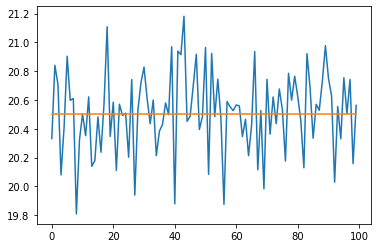

[20.331893920898438,
 20.84079933166504,
 20.709199905395508,
 20.07900047302246,
 20.411800384521484,
 20.904199600219727,
 20.59760093688965,
 20.610000610351562,
 19.808000564575195,
 20.32159996032715,
 20.503400802612305,
 20.351600646972656,
 20.621400833129883,
 20.138999938964844,
 20.177799224853516,
 20.482200622558594,
 20.236799240112305,
 20.579200744628906,
 21.108800888061523,
 20.347000122070312,
 20.5851993560791,
 20.110599517822266,
 20.570199966430664,
 20.492399215698242,
 20.50819969177246,
 20.202199935913086,
 20.74220085144043,
 19.938400268554688,
 20.528799057006836,
 20.719999313354492,
 20.82819938659668,
 20.6112003326416,
 20.434799194335938,
 20.600000381469727,
 20.212799072265625,
 20.38279914855957,
 20.429000854492188,
 20.578800201416016,
 20.498199462890625,
 20.96980094909668,
 19.878000259399414,
 20.93939971923828,
 20.9148006439209,
 21.18199920654297,
 20.451400756835938,
 20.486600875854492,
 20.69659996032715,
 20.917999267578125,
 20.394599

In [26]:
plt.plot(loss_train)
plt.plot(loss_test)
plt.show()